# Pump and Treat - Well System Model

### Problem definition 

A heavy metal contamination issue has arisen at a site where a smelter, established in 1966 for chromium production, operated without proper anti-seepage measures beneath its slag deposits. Over time, rainfall leached significant quantities of toxic metals, primarily hexavalent chromium (Cr(VI)) into the soil and groundwater. A commonly used remediation approach for such contamination is the pump-and-treat (PAT) method, which involves extracting polluted groundwater via wells and treating it at a surface facility. However, PAT has notable drawbacks, such as high operational costs, limited effectiveness in low-permeability formations and unsaturated zones, and the risk of altering the natural hydraulic gradient. Field monitoring data showed that Cr(VI) contamination in the unconfined aquifer peak concentrations reaching 1000 mg/L, far exceeding the permissible limit of 0.1 mg/L (He et al., 2024). Addressing this groundwater pollution is critical to protect both environmental health and water quality, since there is an aquifer used for drinking water supply at the area. There are three wells already existing at the area close to the contamination source. They will be used to perform the PAT. 

![River Base Concept Model](river_and_wells.svg)

### Model Description

This groundwater flow and contaminant transport model simulates a pump-and-treat (PAT) remediation system for a site contaminated with hexavalent chromium (Cr(VI)). 
#### Domain 
The model domain is a 2D single-layer grid consisting of 101 rows and columns, representing a 100 m × 100 m unconfined aquifer with a thickness of 30 m. 
### Boundary conditions 
Boundary conditions include constant head boundaries on the left and right edges of the domain to simulate regional flow, with head values set to 25.0 m and 24.5 m, respectively. Three extraction wells are positioned between the contamination source and a sensitive municipal boundary to control plume migration. Initial contamination is introduced at six grid cells near the source zone using the CNC package, with maximum concentrations up to 1000 mg/L. 
### Layer properties 
Groundwater flow is modeled using the NPF, STO, and CHD packages, while solute transport is handled by the GWT model with advection, dispersion, and source-sink mixing processes. The SSM package connects flow and transport components by linking CHD and WEL sources with auxiliary concentration data. Output includes head, flow, and concentration files, enabling visualization and assessment of plume dynamics and remediation performance.


# Start setting up the model 

### Magic commands - auto reload of the model each time 

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

### Import from pymf6tools the functions to run, get and visualize simulation results

In [3]:
from pathlib import Path 
from pymf6.mf6 import MF6
import pandas as pd 
from functools import partial 
import numpy as np 

from pymf6_tools.make_model import run_simulation, get_simulation


from pymf6_tools.base_model import make_model_data
from pymf6_tools.make_model import make_input, run_simulation, get_simulation
from pymf6_tools.plotting import show_heads, show_well_head, show_bcs

In [4]:
from pymf6_tools.plotting import show_heads, show_well_head, show_concentration, show_bcs, show_bot_elevations, show_river_stages, contour_bot_elevations, plot_spec_discharge 

## Set model path and name 

In [5]:
model_path = r'models/pumptreatnw'
model_name = 'pumptreatnw'

## Run simulation 

In [6]:
run_simulation(model_path, verbosity_level=0)

In [7]:
run_simulation?

Signature: run_simulation(model_path, verbosity_level=0)
Docstring: Run a MODFLOW 6 model.
File:      c:\users\lucialabarca\re-run noteboks\pymf6-validation\.pixi\envs\default\lib\site-packages\pymf6_tools\make_model.py
Type:      function

## Inspect model parameters 

In [8]:
sim = get_simulation(model_path, model_name)
ml = sim.get_model('gwf_' + model_name)
dis = ml.get_package('dis') 

In [9]:
dis.data_list

[,
 ,
 ,
 ,
 ,
 ,
 ,
 ,
 ,
 {internal}
 (1),
 {internal}
 (101),
 {internal}
 (101),
 {constant 1.0},
 {constant 1.0},
 {constant 0.0},
 {constant -30.0},
 ]

## Visualization of Input and Output - e.g. Boundary conditions, Heads and Contamination plume

### Plot Boundary conditions 

### Boundary Conditions 
Note that you should change the "bc_names" according to the boundary conditions present in the simulation.  
<span style="color:blue">'chd'</span> Constant-head boundary  
<span style="color:blue">'wel'</span> River boundary

In [10]:
show_bcs?

Signature:
show_bcs(
    model_path,
    name,
    title='Boundary Conditions',
    bc_names=('chd', 'wel', 'riv'),
    show_grid=True,
)
Docstring: Show location of boundary conditions.
File:      c:\users\lucialabarca\re-run noteboks\pymf6-validation\.pixi\envs\default\lib\site-packages\pymf6_tools\plotting.py
Type:      function

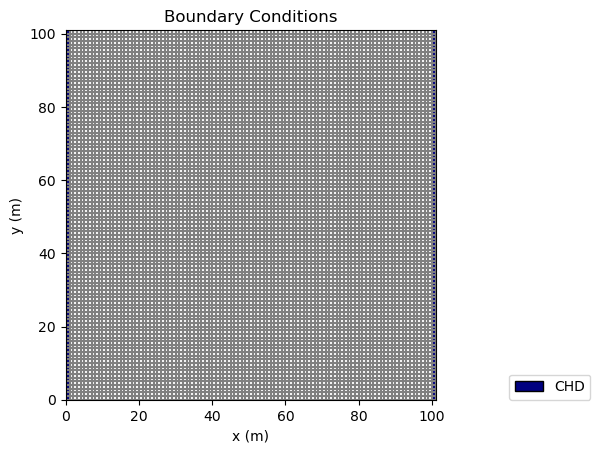

In [11]:
show_bcs(model_path, name=model_name, bc_names=('chd',))

### Groundwater level 

In [12]:
show_heads?

Signature:
show_heads(
    model_path,
    name,
    title='',
    show_grid=True,
    show_wells=True,
    show_contours=True,
    kstpkper=(119, 2),
    spdis_index=240,
)
Docstring: Plot calculated heads along with flow vector.
File:      c:\users\lucialabarca\re-run noteboks\pymf6-validation\.pixi\envs\default\lib\site-packages\pymf6_tools\plotting.py
Type:      function

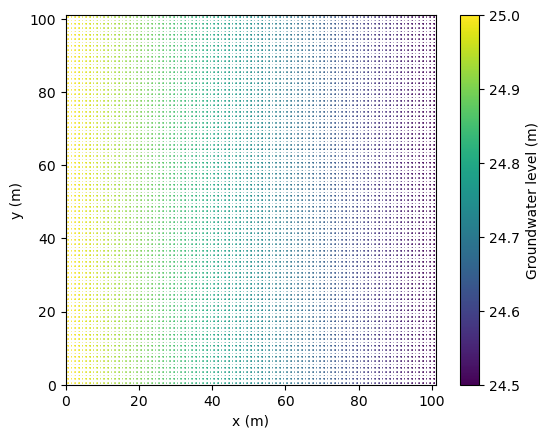

In [13]:
show_heads(model_path, model_name, show_wells=False, kstpkper=(249, 1))

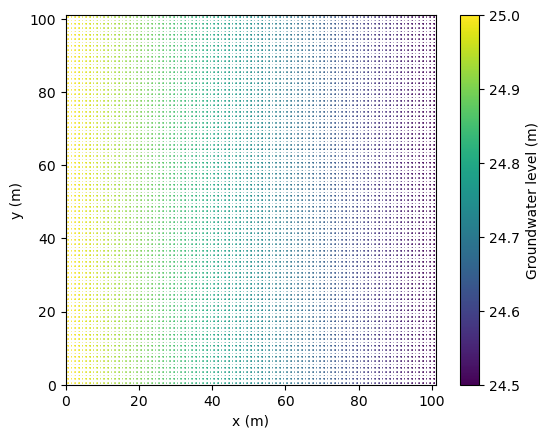

In [14]:
show_heads(model_path, name=model_name, show_grid=True, show_wells=False , show_contours = True,  kstpkper=(249, 1))
#show_heads(model_path, model_name, show_wells=False)

🔍 What is kstpkper?
In MODFLOW 6, kstpkper = (kstp, kper) refers to:

kstp: Time step within a stress period

kper: Stress period number

FloPy tracks head and budget data per (kstp, kper). If you ask for a timestep combination that wasn't saved or doesn't exist, it throws this error.

✅ How to Find your kstper?
Check your simulation's stress period setup
From the model in this case 

perioddata=[(1.0, 1, 1.0), (2000.0, 150, 1.0)]

There are:

Stress period 0: 1 time step

Stress period 1: 150 time steps

So valid kstpkper values:

For kper=0: only (0, 0)

For kper=1: (0, 1) to (149, 1)

Since we want the final time then is its (149, 1).

### Visualize contamination plume

### Concentration

Exception: ftype not specified

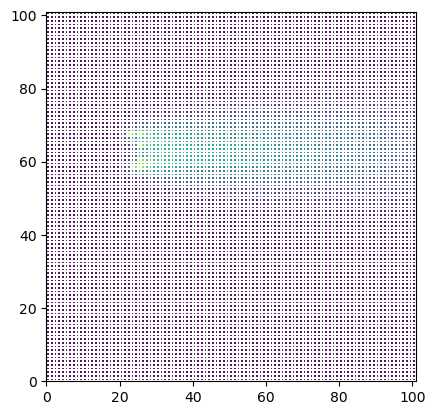

In [15]:
show_concentration(model_path, model_name, show_wells=True , show_arrows=True, show_rivers=False,  kstpkper=(249, 1))

The current situation shows a contamination plume of Cr(VI) on the right side of the model, which is the area that we want to maintain the water quality. 
The model without control would result in a plume evolution that would continue to extend a reach the drinking water supply resources. The main objective is to maintain and regulate the water quality standards of the aquifer. Further containing the contamination plume from extending beyond the observation well is essential to reduce costs of the remediation and maintenance. There are three existing wells on the site already that have different maximum rates, therefore they will be used to perform the PAT. 


## Solving it with unregulated pumping campaign

### Set path for the model with the wells 

In [ ]:
model_path = r'models/pumptreat'
model_name = 'pumptreat'

### Location of the wells 

In [ ]:
show_bcs(model_path, name=model_name, bc_names=('chd','wel'))

### Specific Discharge - Interactive graph (layer and time)
Specify the layer and time of the simulation to be visualized.

In [ ]:
plot_spec_discharge(model_path, model_name, layer=1, times= 249)

In [ ]:
plot_spec_discharge(model_path, model_name, layer=2, times = 300)

### Groundwater level 

In [ ]:
show_heads(model_path, model_name, show_wells=False,  kstpkper=(249, 1))

### Well head 

In [ ]:
show_well_head((1, 34, 26), model_path, model_name, times=[1], y_start=0, y_end=20)

### Contamination plume 

In [ ]:
show_concentration(model_path, model_name, show_wells=False, show_arrows=True, show_rivers=False,  kstpkper=(249, 1))

### Limitations of the Unregulated Pump-and-Treat Approach

An unregulated pump-and-treat (PAT) strategy, where extraction wells operate continuously at maximum capacity, is both inefficient and potentially counterproductive. Without adaptive control, this approach cannot respond to changes in contaminant levels, leading to unnecessary energy use and treatment of clean water. Moreover, excessive pumping risks altering the natural hydraulic gradient, potentially drawing contaminants toward clean areas, including the municipal boundary. In low-permeability zones, it may also reduce effectiveness by bypassing trapped pollutants. Therefore, a controlled, feedback-based strategy is essential to optimize remediation efforts, contain the contamination plume, and maintain water quality standards efficiently.

## pmyf6 dynamic control 

### Controlled case 

The wells will be pumping 24h and regulated by two key thresholds: environmental quality standards for water of 0.1 mg/L (He et al., 2024) and maximum rate per well was 6 m3/h (144 m3 /d) (Song et al., 2024). To increase efficiency, we vary the rate of the pumping wells since optimization is crucial to balance treatment speed, cost and water use.
The technical objective is to dynamically regulate the wells based on the values at the observation well, located at the area that we want to protect at the municipal boundary. The state has regulated thresholds for the amount that is possible to extract and treat. That amount can be reached or not. By using a control script, we optimize by regulating the minimum rate needed to maintain the water quality bellow the threshold and implies that we will treat the optimum amount. 

### Inspect visualization tools

In [ ]:
show_bcs?

### Inspect the parameters by importing the model results 

In [ ]:
model_path = r'models/transbase'
model_name = 'transbase'

In [ ]:
from pymf6.mf6 import MF6

In [ ]:
mf6 = MF6(model_path)

In [ ]:
mf6.models.keys()

In [ ]:
gwf_models = mf6.models['gwf6']

In [ ]:
gwf_models.keys()

In [ ]:
gwt_models = mf6.models['gwt6']

In [ ]:
gwt_models.keys()

### Inspect model packages 

In [ ]:
gwt = gwt_models['gwt_transbase']

In [ ]:
gwf = gwf_models['gwf_transbase']

In [ ]:
gwf.packages

In [ ]:
gwt.packages

### Inspect well package 

In [ ]:
 for _ in mf6.model_loop():
        if gwf.kper > 0: # break after
            break

In [ ]:
wel = gwf.packages.get_package('wel-1').as_mutable_bc()

In [ ]:
wel.nodelist[:]

### Inspect values at any node

In [ ]:
initial_head = gwf.X[(1, 6, 7)]
initial_head

### Forward it to next time-step 2

In [ ]:
for _ in mf6.model_loop():
        if gwf.kper > 1: # break after
            break

### Concentration at sources

In [ ]:
conc = gwt.X[(1, 7, 2)]
conc

In [ ]:
conc = gwt.X[(1, 6, 2)]
conc

In [ ]:
conc = gwt.X[(1, 6, 3)]
conc

In [ ]:
conc = gwt.X[(1, 6, 3)]
conc

### concentration at observation well 

In [ ]:
conc = gwt.X[(1, 6, 7)]
conc

### 

In [ ]:
for _ in mf6.model_loop():
        if gwf.kper > 2: # break after
            break

### Controlled Well Head 

### Run the control script 

### Why running the control has imporve dthe model - back up by numbers 